<a href="https://colab.research.google.com/github/Ilhan-Krdnz/tensorflow_mnist/blob/main/Mnist_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.astype('float32') / 255.0
#x_test = x_test.astype('float32') / 255.0

In [4]:
print("Type of x_train:", type(x_train))
print("Shape of x_train:", x_train.shape)

Type of x_train: <class 'numpy.ndarray'>
Shape of x_train: (60000, 28, 28)


In [ ]:
print("Shape of an image in x_train:", x_train[0].shape)
print("First image (as raw pixel values):\n", x_train[0])

In [34]:
#Reshape method flattens the matrix that we had 28*28 into a one single row of 784, -1 lets it keep its first value which is 60000
#Normalization, by dividing it by 255 so the values are in range [0,1]
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') /255.0

In [35]:
#Defining our model
model = keras.Sequential([
       layers.Dense(128, activation='relu',input_shape=(784,), name="First_hidden_layer"),
       layers.Dense(128, activation='relu'),
       layers.Dense(10, activation='softmax')
])
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 19s - loss: 0.2336 - accuracy: 0.9308 - 19s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.0970 - accuracy: 0.9703 - 5s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.0675 - accuracy: 0.9793 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.0524 - accuracy: 0.9830 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.0403 - accuracy: 0.9869 - 5s/epoch - 3ms/step


In [36]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)
model.save("Good_start")

313/313 - 1s - loss: 0.0871 - accuracy: 0.9742 - 670ms/epoch - 2ms/step


In [127]:
#importing your own test data
custom_img_path = '/content/test_image12.png'
custom_img = image.load_img(custom_img_path, color_mode='grayscale', target_size=(28, 28))
custom_img_array = image.img_to_array(custom_img)
custom_img_array = custom_img_array.reshape(-1, 28*28).astype('float32') / 255.0

1/1 [==============================] - 0s 16ms/step


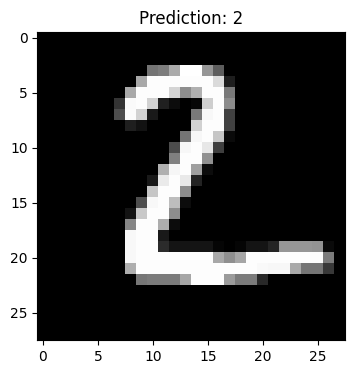

1/1 [==============================] - 0s 16ms/step


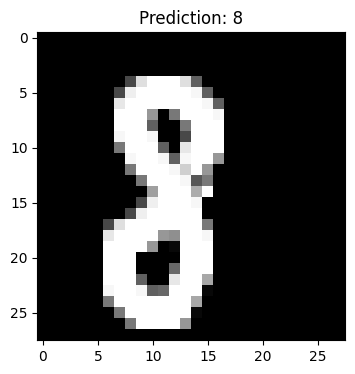

In [139]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#loading the model and the image, extracting the largest predicted class(In this case a number between 1-10) and comparing the results with answers
load_model('Good_start')
G = 1
img_array = x_test[G]

def predict(img_array):
  if img_array.shape == (784,):
    img_array = np.expand_dims(img_array, axis=0)

  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions, axis=1)
  return predicted_class

def plotting(img, predicted_class):
  plt.figure(figsize=(4, 4))
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(f'Prediction: {predicted_class[0]}')
  plt.show()

#plotting mnist test image and a custom image that i drew myself
#for mnist data
de_flattened_img = img_array.reshape(-1, 28, 28)
plotting(de_flattened_img, predict(img_array))

#for custom data that i drew myself
de_flattened_img = custom_img_array.reshape(-1, 28, 28)
plotting(de_flattened_img, predict(custom_img_array))